# Analisis multidimensional de la Pobreza
Este notebook utiliza la base "indices_pobreza" creada por el notebook model_gen para realizar el analisis de la red de privaciones de los indicadores y de las dimensiones de la Pobreza. Se utiliza el Grado Nodal y el Indice de Intermediacion.

Finalmente, se desarrolla un modelo Montecarlo para simular el efecto en el indice general de pobreza si es que una dimensión no estuviera.

In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd

## Creacion de las variables

In [2]:
# Importamos la base de datos "indices_pobreza.csv"
indices_pobreza = pd.read_csv("indices_pobreza.csv")

In [3]:
indices_pobreza.columns = ['Inasistencia Educacion','Educacion Superior', 'Educacion Incompleta', 'Empleo infantil', 'Desempleo','Pensiones', 'Pobreza extrema', 'Agua publica', 'Hacinamiento', 'Deficit habitacional', 'Saneamiento Excretas', 'Recoleccion Basura']

In [4]:
indices_pobreza.head()

,Inasistencia Educacion,Educacion Superior,Educacion Incompleta,Empleo infantil,Desempleo,Pensiones,Pobreza extrema,Agua publica,Hacinamiento,Deficit habitacional,Saneamiento Excretas,Recoleccion Basura
0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0


## Calculo de Relaciones

In [5]:
# Calculamos las relacion entre las diferentes columnas usando el Coeficiente de Pearson
correlation = indices_pobreza.corr(method='pearson')

correlation

,Inasistencia Educacion,Educacion Superior,Educacion Incompleta,Empleo infantil,Desempleo,Pensiones,Pobreza extrema,Agua publica,Hacinamiento,Deficit habitacional,Saneamiento Excretas,Recoleccion Basura
Inasistencia Educacion,1.000000,-0.014936,-0.328155,1.000000,-0.088117,0.063178,0.023010,0.013087,-0.002141,0.014382,0.004780,0.010980
Educacion Superior,-0.014936,1.000000,0.045515,-0.014936,0.074089,0.179870,0.025172,0.020354,-0.012007,0.002940,0.011517,0.007931
Educacion Incompleta,-0.328155,0.045515,1.000000,-0.328155,0.006559,-0.084772,-0.021283,-0.008620,-0.000639,-0.015007,-0.015451,-0.012109
Empleo infantil,1.000000,-0.014936,-0.328155,1.000000,-0.088117,0.063178,0.023010,0.013087,-0.002141,0.014382,0.004780,0.010980
Desempleo,-0.088117,0.074089,0.006559,-0.088117,1.000000,0.261593,0.062738,0.040451,0.014027,0.031025,0.060118,0.026296
Pensiones,0.063178,0.179870,-0.084772,0.063178,0.261593,1.000000,0.104029,0.044805,0.004607,0.037999,0.058695,0.022872
Pobreza extrema,0.023010,0.025172,-0.021283,0.023010,0.062738,0.104029,1.000000,0.016117,0.002969,0.003550,0.013138,0.009236
Agua publica,0.013087,0.020354,-0.008620,0.013087,0.040451,0.044805,0.016117,1.000000,0.033071,0.325361,0.294326,0.513175
Hacinamiento,-0.002141,-0.012007,-0.000639,-0.002141,0.014027,0.004607,0.002969,0.033071,1.000000,0.140502,0.104685,0.007533
Deficit habitacional,0.014382,0.002940,-0.015007,0.014382,0.031025,0.037999,0.003550,0.325361,0.140502,1.000000,0.253619,0.313825


## Matriz de correlaciones

In [6]:
# Matriz de correlación entre 0 y 1 basada en el coeficiente de Pearson. 
# Solo incluye los coeficientes que sean mayores a 0.01 bilaterales y que existan correlaciones positivas, excluya las correlaciones negativas.
correlation = correlation[(correlation >= 0.01) & (correlation <= 1)]

In [7]:
correlation

,Inasistencia Educacion,Educacion Superior,Educacion Incompleta,Empleo infantil,Desempleo,Pensiones,Pobreza extrema,Agua publica,Hacinamiento,Deficit habitacional,Saneamiento Excretas,Recoleccion Basura
Inasistencia Educacion,1.000000,NaN,NaN,1.000000,NaN,0.063178,0.023010,0.013087,NaN,0.014382,NaN,0.010980
Educacion Superior,NaN,1.000000,0.045515,NaN,0.074089,0.179870,0.025172,0.020354,NaN,NaN,0.011517,NaN
Educacion Incompleta,NaN,0.045515,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empleo infantil,1.000000,NaN,NaN,1.000000,NaN,0.063178,0.023010,0.013087,NaN,0.014382,NaN,0.010980
Desempleo,NaN,0.074089,NaN,NaN,1.000000,0.261593,0.062738,0.040451,0.014027,0.031025,0.060118,0.026296
Pensiones,0.063178,0.179870,NaN,0.063178,0.261593,1.000000,0.104029,0.044805,NaN,0.037999,0.058695,0.022872
Pobreza extrema,0.023010,0.025172,NaN,0.023010,0.062738,0.104029,1.000000,0.016117,NaN,NaN,0.013138,NaN
Agua publica,0.013087,0.020354,NaN,0.013087,0.040451,0.044805,0.016117,1.000000,0.033071,0.325361,0.294326,0.513175
Hacinamiento,NaN,NaN,NaN,NaN,0.014027,NaN,NaN,0.033071,1.000000,0.140502,0.104685,NaN
Deficit habitacional,0.014382,NaN,NaN,0.014382,0.031025,0.037999,NaN,0.325361,0.140502,1.000000,0.253619,0.313825


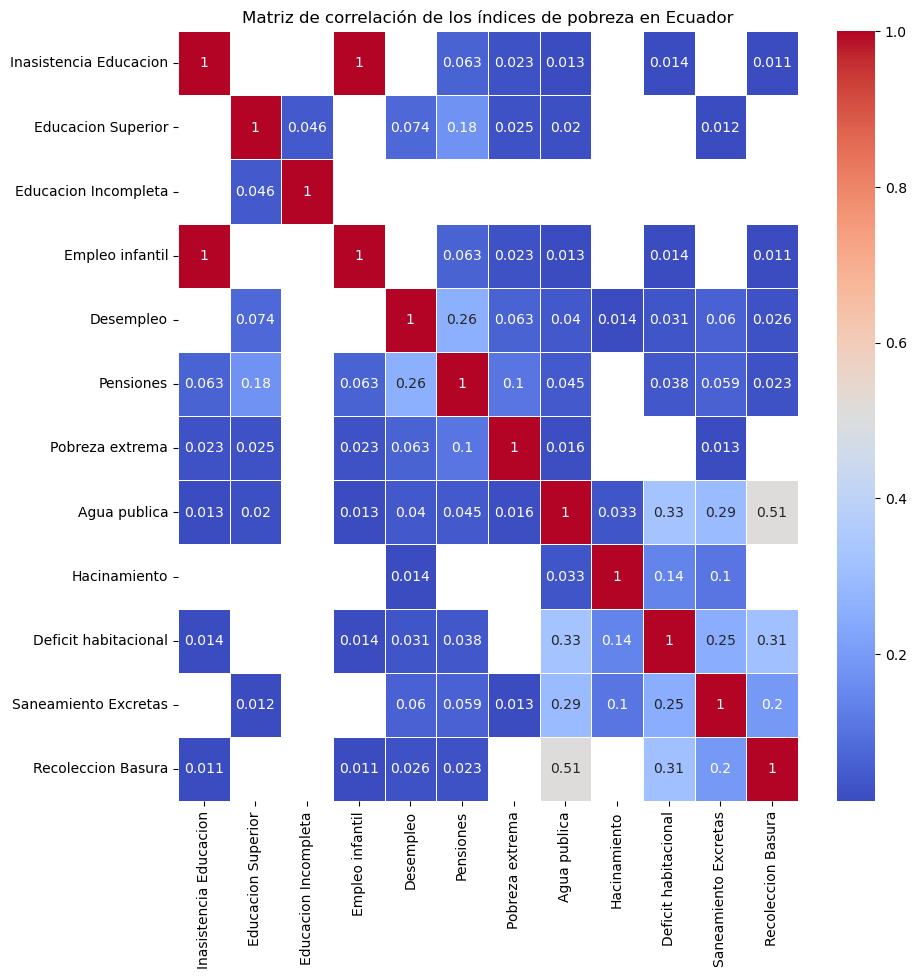

In [8]:
# Graficamos la matriz de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de los índices de pobreza en Ecuador')
plt.show()

# Nivel de abstraccion: Indicadores

## Analisis de la red de privaciones

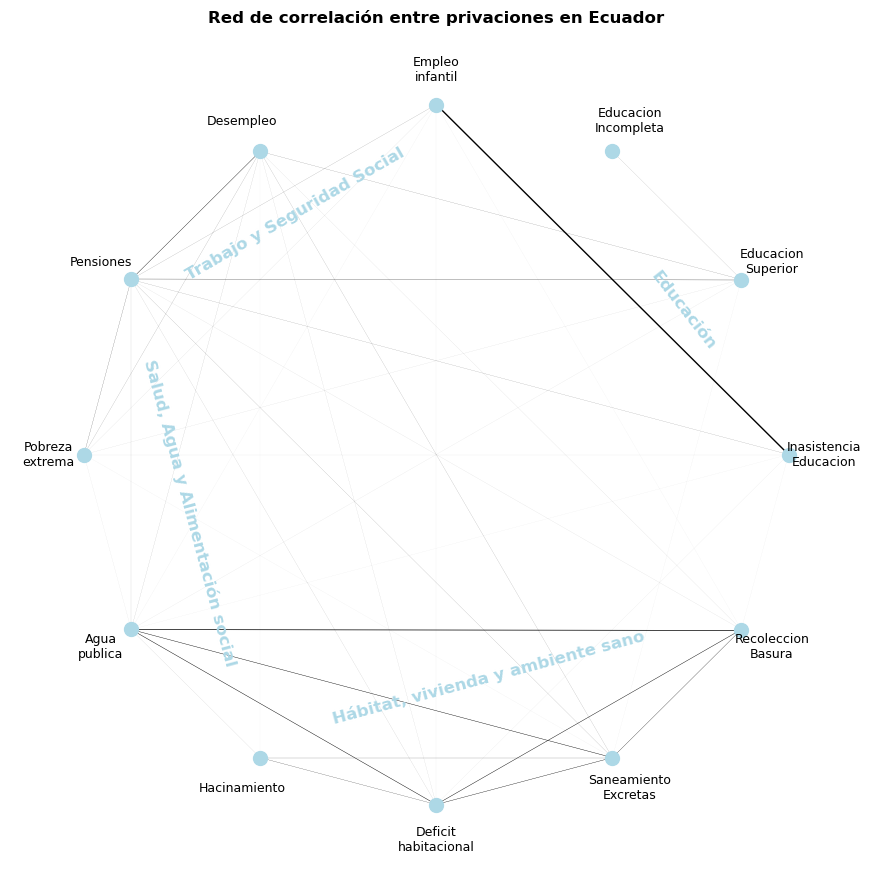

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        if i != j:
            node1 = correlation.columns[i].replace(' ', '\n')
            node2 = correlation.columns[j].replace(' ', '\n')
            G.add_edge(node1, node2, weight=abs(correlation.iloc[i, j]))

edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

plt.figure(figsize=(11, 11))
pos = nx.circular_layout(G)

# Grafica los nodos
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')

# Grafica los edges
nx.draw_networkx_edges(G, pos, width=weights)

# Grafica las etiquetas
label_pos = {node: (1.1*x, 1.1*y) for node, (x, y) in pos.items()} 
nx.draw_networkx_labels(G, label_pos, font_size=9, font_weight='light', font_color='black')

# Añade el texto de las dimensiones
plt.text(0.7, 0.3, 'Educación', fontsize=12, ha='center', rotation=-52, color='lightblue', fontweight='bold')
plt.text(-0.4, 0.5, 'Trabajo y Seguridad Social', fontsize=12, ha='center', rotation=30, color='lightblue', fontweight='bold') 
plt.text(-0.7, -0.6, 'Salud, Agua y Alimentación social', fontsize=12, ha='center', rotation=-75, color='lightblue', fontweight='bold') 
plt.text(0.15, -0.77, 'Hábitat, vivienda y ambiente sano', fontsize=12, ha='center', rotation=15, color='lightblue', fontweight='bold') 



plt.title('Red de correlación entre privaciones en Ecuador', fontsize=12, fontweight='bold', color='black')
plt.axis('off')
plt.show()

## Coeficiente estructural: Grado Nodal

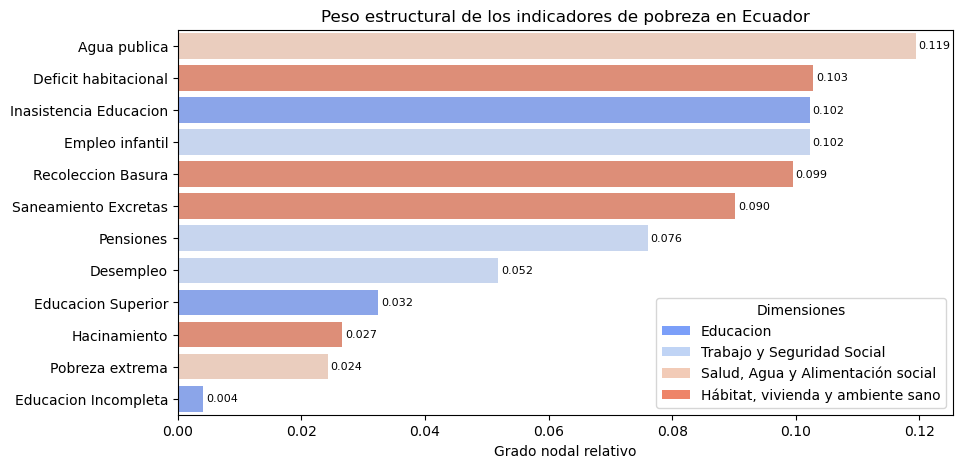

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

G = nx.Graph()

# Nos aseguramos que los pesos esten correctamente calculados
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        if i != j and not pd.isnull(correlation.iloc[i, j]):
            G.add_edge(correlation.columns[i], correlation.columns[j], weight=abs(correlation.iloc[i, j]))

# Calculamos el grado nodal relativo
degree = G.degree(weight='weight')
if degree:
    relative_nodal_degree = pd.DataFrame(degree, columns=['Indicator', 'Relative Nodal Degree'])
    relative_nodal_degree['Relative Nodal Degree'] = relative_nodal_degree['Relative Nodal Degree'] / (len(G.nodes()) - 1)

    # Definimos las dimensiones de cada indicador
    groups = {'Empleo infantil': 'Trabajo y Seguridad Social', 'Educacion Superior': 'Educacion', 'Agua publica': 'Salud, Agua y Alimentación social', 'Inasistencia Educacion': 'Educacion', 
              'Recoleccion Basura': 'Hábitat, vivienda y ambiente sano', 'Deficit habitacional': 'Hábitat, vivienda y ambiente sano', 'Saneamiento Excretas':'Hábitat, vivienda y ambiente sano',
              'Pensiones': 'Trabajo y Seguridad Social', 'Desempleo': 'Trabajo y Seguridad Social', 'Pobreza extrema': 'Salud, Agua y Alimentación social', 'Educacion Incompleta':'Educacion', 'Hacinamiento': 'Hábitat, vivienda y ambiente sano'}  # Replace with your actual groups
    relative_nodal_degree['Group'] = relative_nodal_degree['Indicator'].map(groups)

    unique_groups = relative_nodal_degree['Group'].unique()

    # Creamos la paleta de colores
    palette = sns.color_palette('coolwarm', n_colors=len(unique_groups))

    # Creamos un diccionario con los colores
    color_dict = dict(zip(unique_groups, palette))

    # Mapeamos los colores a las dimensiones
    relative_nodal_degree['Color'] = relative_nodal_degree['Group'].map(color_dict)

    # Ordenamos el dataframe
    relative_nodal_degree = relative_nodal_degree.sort_values(by='Relative Nodal Degree', ascending=False)

    # Graficamos el barplot
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(x='Relative Nodal Degree', y='Indicator', data=relative_nodal_degree, palette=relative_nodal_degree['Color'])

    # Añadimos los valores a las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_width(), '.3f'), 
                         (p.get_width(), p.get_y() + p.get_height() / 2.), 
                         ha = 'left', 
                         va = 'center', 
                         size=8,
                         xytext = (2, 0), 
                         textcoords = 'offset points')
        
    # Creamos las leyendas
    legend_elements = [Patch(facecolor=color_dict[group], label=group) for group in unique_groups]
    plt.legend(handles=legend_elements, title='Dimensiones')

    plt.title('Peso estructural de los indicadores de pobreza en Ecuador')
    plt.xlabel('Grado nodal relativo')
    plt.ylabel('')
    plt.show()
else:
    print("The graph's degree is None. Please check the weights in your graph.")

## Coeficiente estructural: Indice de intermedicación

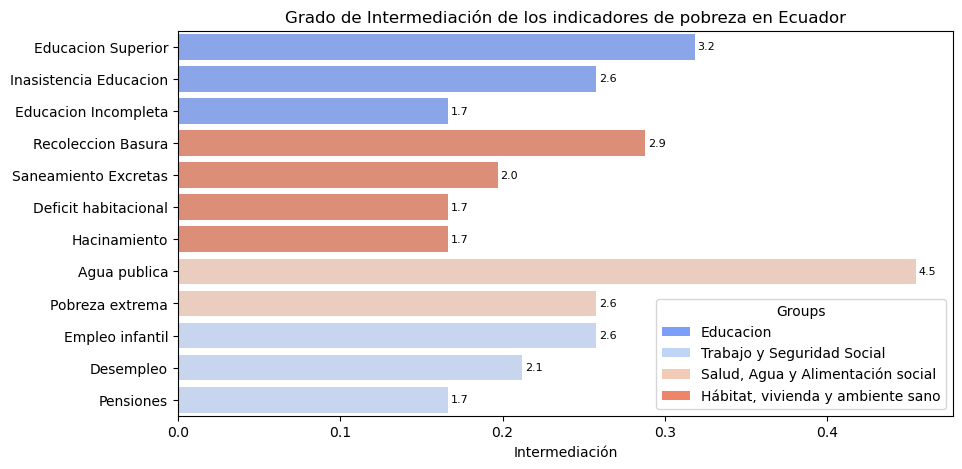

In [11]:
# Definimos el grado de intermediación
groups = {'Empleo infantil': 'Trabajo y Seguridad Social', 'Educacion Superior': 'Educacion', 'Agua publica': 'Salud, Agua y Alimentación social', 'Inasistencia Educacion': 'Educacion', 
          'Recoleccion Basura': 'Hábitat, vivienda y ambiente sano', 'Deficit habitacional': 'Hábitat, vivienda y ambiente sano', 'Saneamiento Excretas':'Hábitat, vivienda y ambiente sano',
          'Pensiones': 'Trabajo y Seguridad Social', 'Desempleo': 'Trabajo y Seguridad Social', 'Pobreza extrema': 'Salud, Agua y Alimentación social', 'Educacion Incompleta':'Educacion', 'Hacinamiento': 'Hábitat, vivienda y ambiente sano'}  # Replace with your actual groups

betweenness = nx.betweenness_centrality(G, weight='weight', normalized=True, endpoints=True)

if betweenness:
    betweenness = pd.DataFrame(betweenness.items(), columns=['Indicator', 'Betweenness'])
    
    # Mapeamos los indicadores a las dimensiones
    betweenness['Group'] = betweenness['Indicator'].map(groups)

    
    unique_groups = betweenness['Group'].unique()

    # Creamos la paleta de colores
    palette = sns.color_palette('coolwarm', n_colors=len(unique_groups))

    # Creamos un diccionario con los colores
    color_dict = dict(zip(unique_groups, palette))

    # Mapeamos los colores a las dimensiones
    betweenness['Color'] = betweenness['Group'].map(color_dict)

    # Ordenamos el dataframe
    betweenness = betweenness.sort_values(by=['Group', 'Betweenness'], ascending=[True, False])

    # Graficamos el barplot
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(x='Betweenness', y='Indicator', data=betweenness, palette=betweenness['Color'])

    # Añadimos los valores a las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_width()*10, '.1f'), 
                         (p.get_width(), p.get_y() + p.get_height() / 2.), 
                         ha = 'left', 
                         va = 'center', 
                         size=8,
                         xytext = (2, 0), 
                         textcoords = 'offset points')

    # Creamos las leyendas
    legend_elements = [Patch(facecolor=color_dict[group], label=group) for group in unique_groups]
    plt.legend(handles=legend_elements, title='Groups')

    plt.title('Grado de Intermediación de los indicadores de pobreza en Ecuador')
    plt.xlabel('Intermediación')
    plt.ylabel('')
    plt.show()
else:
    print("The graph's betweenness is None. Please check the weights in your graph.")

# Nivel de Abstraccion: Dimensiones

In [12]:
groups = {'Empleo infantil': 'Trabajo y Seguridad Social', 'Educacion Superior': 'Educacion', 'Agua publica': 'Salud, Agua y Alimentación social', 'Inasistencia Educacion': 'Educacion', 
          'Recoleccion Basura': 'Hábitat, vivienda y ambiente sano', 'Deficit habitacional': 'Hábitat, vivienda y ambiente sano', 'Saneamiento Excretas':'Hábitat, vivienda y ambiente sano',
          'Pensiones': 'Trabajo y Seguridad Social', 'Desempleo': 'Trabajo y Seguridad Social', 'Pobreza extrema': 'Salud, Agua y Alimentación social', 'Educacion Incompleta':'Educacion', 'Hacinamiento': 'Hábitat, vivienda y ambiente sano'}

# Creamos un nuevo DataFrame con la suma de cada indicador en indices_pobreza en cada grupo
dimension = indices_pobreza.groupby(groups, axis=1).sum()

# Creamos un nuevo DataFrame con la suma de cada indicador en indices_pobreza en cada grupo en una escala de 0 a 3
#dimension = dimension.apply(lambda x: (x - x.min()) / (x.max() - x.min()) * 3)


In [13]:
dimension.head()

,Educacion,"Hábitat, vivienda y ambiente sano","Salud, Agua y Alimentación social",Trabajo y Seguridad Social
0,1,0,0,1
1,1,1,0,1
2,0,0,0,2
3,1,0,0,1
4,1,0,0,1


In [14]:
correlation = dimension.corr(method='pearson')
correlation = correlation[(correlation >= 0.01) & (correlation <= 1)]
correlation

,Educacion,"Hábitat, vivienda y ambiente sano","Salud, Agua y Alimentación social",Trabajo y Seguridad Social
Educacion,1.000000,NaN,0.015297,0.086297
"Hábitat, vivienda y ambiente sano",NaN,1.000000,0.475774,0.071133
"Salud, Agua y Alimentación social",0.015297,0.475774,1.000000,0.084970
Trabajo y Seguridad Social,0.086297,0.071133,0.084970,1.000000


## Red de correlaciones entre las dimensiones de pobreza

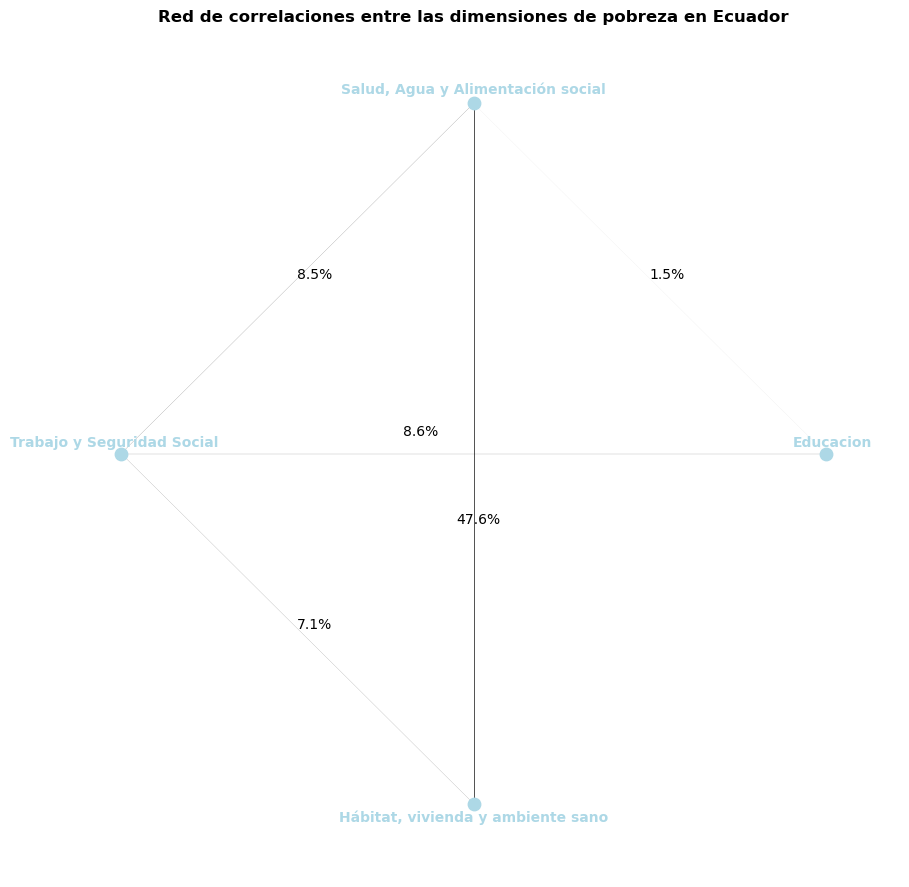

In [25]:
G = nx.Graph()

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        if i != j and not pd.isnull(correlation.iloc[i, j]):
            node1 = correlation.columns[i]
            node2 = correlation.columns[j]
            G.add_edge(node1, node2, weight=abs(correlation.iloc[i, j]))

edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

plt.figure(figsize=(11, 11))
pos = nx.circular_layout(G)

# Grafica los nodos
nx.draw_networkx_nodes(G, pos, node_size=80, node_color='lightblue')

# Grafica los edges
nx.draw_networkx_edges(G, pos, width=weights)


# Grafica las etiquetas
m=0
for u, v, w in G.edges(data='weight'):
    x = ((pos[u][0] + pos[v][0])) / 2
    y = ((pos[u][1] + pos[v][1])) / 2
    if m==2:
        x = x-0.05
        y = y-0.2

    if m==1:
        x = x-0.2
        y = y+0.05
    plt.text(x, y, f"{w*100:.1f}%", fontsize=10)
    m=m+1


# Grafica las etiquetas de los nodos
for node, (x, y) in pos.items():
    if node == 'Educacion':
        y = y + 0.01
    if node == 'Trabajo y Seguridad Social':
        y = y + 0.01   
    if node == 'Hábitat, vivienda y ambiente sano':
        y = y - 0.04
    plt.text(1.02*x, 1.02*y, s=node, fontsize=10, fontweight='bold', color='lightblue', 
             ha='center', va='bottom', rotation=0)

plt.title('Red de correlaciones entre las dimensiones de pobreza en Ecuador', fontsize=12, fontweight='bold', color='black')
plt.axis('off')
plt.show()

## Peso estructural entre las dimensiones de pobreza

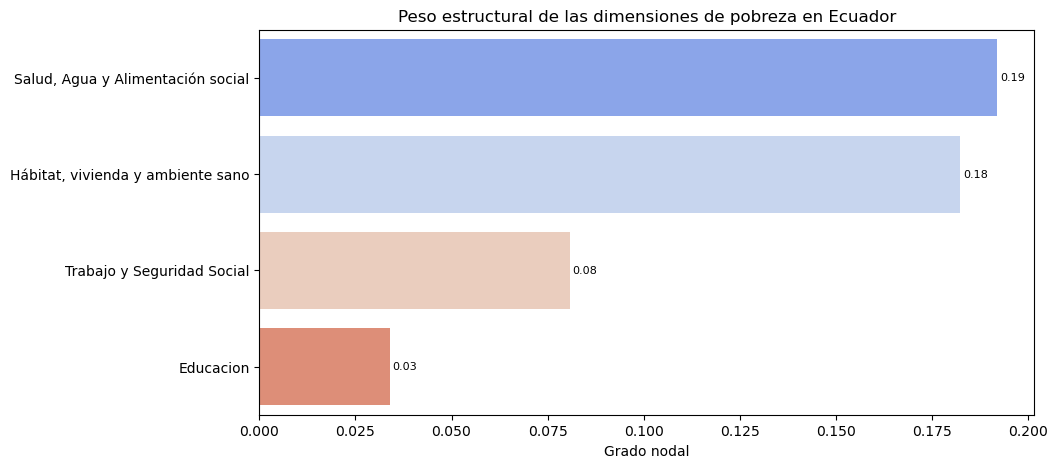

In [26]:
# Calculamos el grado nodal relativo
degree = G.degree(weight='weight')
if degree:
    relative_nodal_degree = pd.DataFrame(degree, columns=['Indicator', 'Relative Nodal Degree'])
    relative_nodal_degree['Relative Nodal Degree'] = relative_nodal_degree['Relative Nodal Degree'] / (len(G.nodes()) - 1)

    # Ordenamos el dataframe
    relative_nodal_degree = relative_nodal_degree.sort_values(by='Relative Nodal Degree', ascending=False)

    # Graficamos el barplot
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(x='Relative Nodal Degree', y='Indicator', data=relative_nodal_degree, palette='coolwarm')

    # Añadimos los valores a las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_width(), '.2f'), 
                         (p.get_width(), p.get_y() + p.get_height() / 2.), 
                         ha = 'left', 
                         va = 'center', 
                         size=8,
                         xytext = (2, 0), 
                         textcoords = 'offset points')
        
    plt.title('Peso estructural de las dimensiones de pobreza en Ecuador')
    plt.xlabel('Grado nodal')
    plt.ylabel('')
    plt.show()
else:
    print("The graph's degree is None. Please check the weights in your graph.")

## Modelo de Simulación Montecarlo

### Descripción:
- Se crea una simulación Montecarlo para ver el impacto de las diferentes dimensiones en el Índice de Pobreza después de retirar una de las dimensiones.
### Supuestos:
- Usaré los datos del DataFrame "dimension"
- Usaré el grado nodal relativo como la probabilidad de que cada dimensión sea seleccionada
- Usaré el peso de cada indicador es del 25%
- El índice de pobreza debe calcularse como la suma de todas las dimensiones para su peso respectivo dividido por el número de filas en la dimensión DataFrame
- Ejecutaré la simulación 1000 veces.

### Recordatorio:
El indice de pobreza global es: 21.12

Retired Dimension: Educacion
Mean Poverty Index: 0.205314466268506
Standard Deviation of Poverty Index: 0.1009584931685926

Retired Dimension: Hábitat, vivienda y ambiente sano
Mean Poverty Index: 0.2471875736036339
Standard Deviation of Poverty Index: 0.06128190338065637

Retired Dimension: Salud, Agua y Alimentación social
Mean Poverty Index: 0.24161265561911172
Standard Deviation of Poverty Index: 0.06285854733573976

Retired Dimension: Trabajo y Seguridad Social
Mean Poverty Index: 0.20201147165208613
Standard Deviation of Poverty Index: 0.0862461701679841



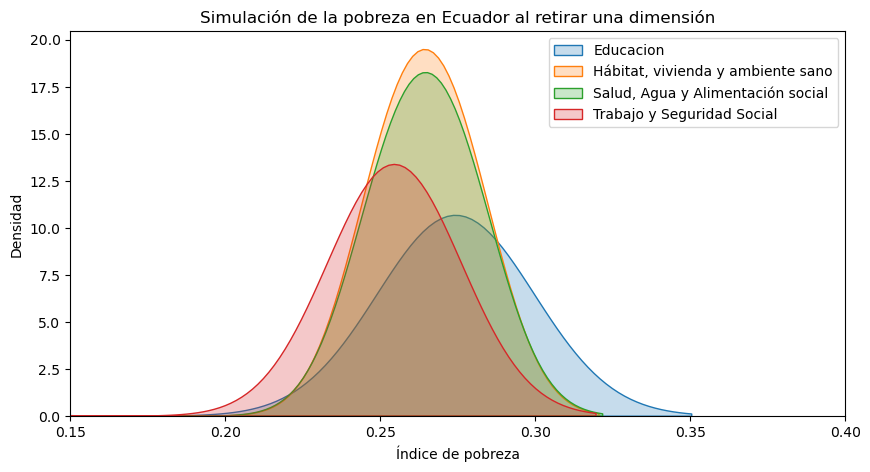

In [40]:
# Definiendo el número de simulaciones
num_simulations = 1000

# Define los pesos para cada indicador
weight_per_indicator = 0.25

# Define la función para simular el índice de pobreza después de retirar una dimensión
def simulate_poverty_index_after_retirement(dimension, retired_dimension):
    poverty_indices = []
    for _ in range(num_simulations):
        # Aleatoriamente selecciona dimensiones basadas en su grado nodal relativo
        selected_dimensions = dimension.drop(columns=retired_dimension).sample(weights=dimension.drop(columns=retired_dimension).sum(), axis=1, random_state=np.random.randint(1000))
        
        # Calcula el índice de pobreza
        poverty_index = (selected_dimensions * weight_per_indicator).sum(axis=1).mean()
        poverty_indices.append(poverty_index)
    return poverty_indices

# Corre la simulación
results = {}
for retired_dimension in dimension.columns:
    poverty_indices = simulate_poverty_index_after_retirement(dimension, retired_dimension)
    results[retired_dimension] = poverty_indices

# Analiza los resultados
for retired_dimension, poverty_indices in results.items():
    mean_poverty_index = np.mean(poverty_indices)
    std_dev_poverty_index = np.std(poverty_indices)
    print(f"Retired Dimension: {retired_dimension}")
    print(f"Mean Poverty Index: {mean_poverty_index}")
    print(f"Standard Deviation of Poverty Index: {std_dev_poverty_index}")
    print()

# Grafica los resultados
plt.figure(figsize=(10, 5))
for retired_dimension, poverty_indices in results.items():
    sns.kdeplot(poverty_indices, label=retired_dimension, fill='fill')
plt.title('Simulación de la pobreza en Ecuador al retirar una dimensión')
plt.xlabel('Índice de pobreza')
plt.ylabel('Densidad')
plt.xlim([0.15, 0.4]) 
plt.legend()
plt.show()
